In [1]:
%%time
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
scalingFactor = 200
rxndiff=dict()

print('Starting scaling = ', scalingFactor)
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


#Growth rate = 3.0
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

gr_sim = dict()

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))


gr_dict = {'gr_1':gr_sim}

def computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict):
    import numpy as np

    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

Starting scaling =  200
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 53.4 s, sys: 607 ms, total: 54 s
Wall time: 54.9 s


In [97]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict)
print(elong_t, std)

[210.67466239393414] [14.44927575234716]


In [91]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))

syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
              [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
              [50,51],[52,53],[58,59,60,61]]
syn_codon_freqs = list()
for syn_codons in syn_codon_list:
    syn_codon_freqs.append(sum(gr25_pCodon[syn_codons]))
    pCodon_uniform[syn_codons] = sum(gr25_pCodon[syn_codons])/sum(pCodon_uniform[syn_codons])*pCodon_uniform[syn_codons]
pCodon_uniform = pCodon_uniform/np.sum(pCodon_uniform)


elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict)
print(elong_t)

[196.74149324105198]


In [100]:
196.7/184

1.0690217391304346

In [ ]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict)
print(elong_t)

In [85]:
#### tRNA shuffling

from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_tRNA_list = list()
p_tRNA_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


for i in range(100):
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict);
    elong_t_tRNA_list.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
211/184

1.1467391304347827

211.0440855767139 4.078545696247915
z-score:  6.042370838062546
p-value 7.593295686406417e-10


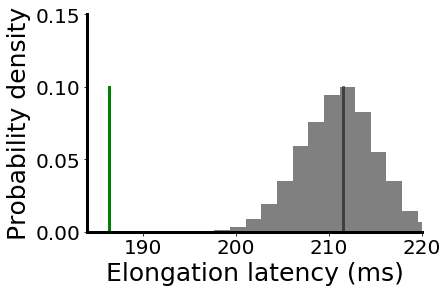

In [76]:
#### Plot tRNA shuffling
import matplotlib.pyplot as plt
import scipy.stats

p_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_elong_t_list.npy')

fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_tRNA_list,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211.5]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)

print(np.mean(elong_t_tRNA_list), np.std(elong_t_tRNA_list))
print('z-score: ', (np.mean(elong_t_tRNA_list)-186.4)/np.std(elong_t_tRNA_list))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_tRNA_list)-186.4)/np.std(elong_t_tRNA_list))))
for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [83]:
#### codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_distrib = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


##First re-normalize to make sure synonymous codons have, together, the same total frequency (keep the genome the same)
syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
              [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
              [50,51],[52,53],[58,59,60,61]]
syn_codon_freqs = list()
for syn_codons in syn_codon_list:
    syn_codon_freqs.append(sum(gr25_pCodon[syn_codons]))
        
for i in range(10000):
    print(i)
    pCodon_uniform = np.zeros(len(gr25_pCodon))
    for syn_codons in syn_codon_list:
        pCodon_uniform[syn_codons] = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(syn_codons))
        pCodon_uniform[syn_codons] = sum(gr25_pCodon[syn_codons])/sum(pCodon_uniform[syn_codons])*pCodon_uniform[syn_codons]
    
    elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict);
    elong_t_list_codon_distrib.append(elong_t[0])
    p_Codon_list.append(pCodon_uniform)
#np.save('FixedtRNA_RandomCodon_10ksample_elong_t_list-syn',elong_t_list_codon_distrib )
#np.save('FixedtRNA_RandomCodon_10ksample_p_Codon_list-syn',p_Codon_list )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
25

1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042


3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681


5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320


6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959


8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598


195.85113364953583 2.134019470316877
z-score:  4.428794479617581
p-value 4.738063403008662e-06


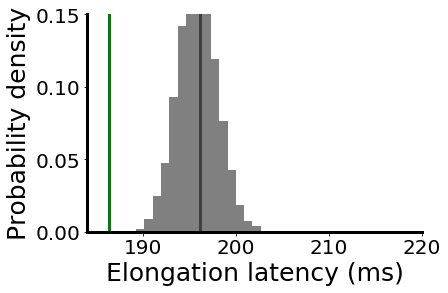

In [84]:
#### Plot codon shuffling sample, w/ conserved synonymous codons
import matplotlib.pyplot as plt
import scipy.stats

p_tRNA_list=np.load('FixedtRNA_RandomCodon_10ksample_p_Codon_list-syn.npy')
elong_t_list_codon_distrib=np.load('FixedtRNA_RandomCodon_10ksample_elong_t_list-syn.npy')
fig,ax = plt.subplots(1,1)
hist = ax.hist(elong_t_list_codon_distrib,color='grey', bins=20,density=True)
#hist = np.histogram(elong_t_list_codon_distrib,bins=20)
#ax.bar(hist[1][0:-1],hist[0]/sum(hist[0]),align='edge')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([196.18]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)
print(np.mean(elong_t_list_codon_distrib), np.std(elong_t_list_codon_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))))


for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

206.291144758029 2.971071979444303
z-score:  6.694938694063327
p-value 1.0788103352318097e-11


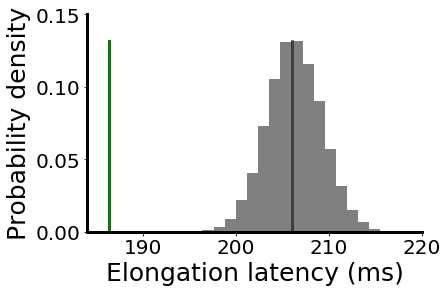

In [74]:
#### Plot codon shuffling
import matplotlib.pyplot as plt


p_tRNA_list=np.load('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_list_codon_distrib=np.load('FixedtRNA_RandomCodon_10ksample_elong_t_list.npy')
fig,ax = plt.subplots(1,1)
hist = ax.hist(elong_t_list_codon_distrib,color='grey', bins=20,density=True)
#hist = np.histogram(elong_t_list_codon_distrib,bins=20)
#ax.bar(hist[1][0:-1],hist[0]/sum(hist[0]),align='edge')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([206]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)
print(np.mean(elong_t_list_codon_distrib), np.std(elong_t_list_codon_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))))


for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [668]:
#### tRNA & codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_tRNA_distrib = list()
p_tRNA_list = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
#combined_arr_list = list()
for i in range(100):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict);
    elong_t_list_codon_tRNA_distrib.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)
    p_Codon_list.append(pCodon_uniform)
    #combined_arr_list.append(np.append(np.array(ptRNA_uniform),np.array(pCodon_uniform)))

np.save('RandomtRNA_RandomCodon_100sample_elong_t_list',elong_t_list_codon_tRNA_distrib )
np.save('RandomtRNA_RandomCodon_100sample_p_Codon_list',p_Codon_list )
np.save('RandomtRNA_RandomCodon_100sample_p_tRNA_list',p_tRNA_list )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


211.0583048364164 2.919491235038141
z-score:  8.446096546028592
p-value 1.506023124227507e-17


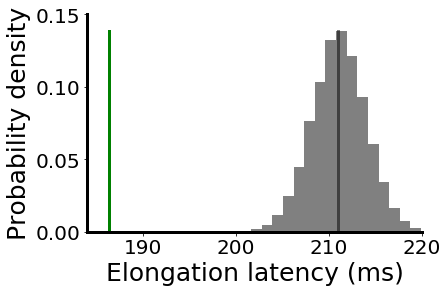

In [75]:
#### Plot tRNA+codon shuffling
import matplotlib.pyplot as plt


elong_t_list_codon_tRNA_distrib=np.load('RandomtRNA_RandomCodon_10ksample_elong_t_list.npy')
fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_list_codon_tRNA_distrib,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)

print(np.mean(elong_t_list_codon_tRNA_distrib), np.std(elong_t_list_codon_tRNA_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))))




for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [31]:
import scipy.stats

#find p-value
scipy.stats.norm.sf((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))

1.506023124227507e-17

In [455]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA,p_tRNA_list_ref):
    #### Compute fitness
    fitness = [sum(np.abs(p_tRNA_list[i] - p_tRNA_list_ref)) for i in np.arange(len(p_tRNA_list))]

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[-n:]
    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[:n]


    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [456]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')

fitness_arr = list()
minelong_arr = list()
for i in range(500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),gr25_ptRNA)
    print(min(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(min(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2_dist',minelong_arr)
#np.save('min_fitness_dist',minelong_arr)

0.9651750845795982
200.67902537722506
0.614272532943319
200.67902537722506
0.614272532943319
199.75506614512028
0.614272532943319
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
200.36874919702345
0.5458408218395132
198.10627444132865
0.5249235820239201
198.10627444132865
0.5225466884467268
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.54378730549556
0.5130816094141721
197.54378730549556
0.5130816094141721
197.54378730549556
0.46966655828465714
196.8909266394599
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
193.30006069469817
0.40906393984665873
193.30006069469817
0.40743027156875833
193.30006069469817
0.4019416043474118
193.13711165244774
0.393993

0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.1184022257663
0.155002827948722
183.34593825736454
0.14410

0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09761517421946345
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
181.99603910989865
0.09563324066429191
183.01654249726678
0.09563324066429191
182.9510436708226
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.06123242 0.00981629 0.07746874 0.00722197 0.01780526 0.00479623
 0.02162919 0.04561267 0.02318606 0.01254851 0.01790484 0.08210164
 0.03170865 0.07682706 0.01538411 0.06779926 0.06058516 0.01423384
 0.01505342 0.02627364 0.00996699 0.03217424 0.0045351  0.01276812
 0.00783409 0.01432301 0.00957376 0.00300967 0.0184787  0.00887799
 0.01360292 0.00850082 0.00307484 0.00831545 0.01858219 0.01889345
 0.01124671 0.03083386 0.06054346 0.01567569]
normed tRNA dist  0.09674264424755832
[ 3.49616348e-04 -8.38201657e-04  2.88730560e-03  1.13369001e-03
  

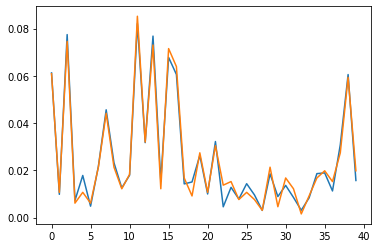

In [460]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old -- any new trends?
#validate genetic algorithm by optimizing for 0 distance w/ old set.
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list.npy')


print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)
print(tRNA_dist)
print(sum(tRNA_dist))
print(np.min(elong_t_tRNA_list))

##I might have just shown that a greedy evolutionary search leads to 
## what's seen in cells, whereas a global search leads to deeper minima.
## I should run this for 1500 too, and also i need to measure the slope
## of both elong time and fitness w/ epoch --> supp fig or main fig.
# Or maybe this is just a control, since greedy is expected here?

In [2]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA):
    
    #### Compute fitness
    fitness = (1/np.array(elong_t_tRNA_list))/sum((1/np.array(elong_t_tRNA_list)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [3]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_tRNASweep_multithread(codon_arr,elong_arr,tRNA_arr,gr_dict,minRange,maxRange):
    import gc
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16

    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    parent_indices = np.argpartition(fitness, n)[-n:]
    tRNA_arr=np.array(tRNA_arr)
    parents = tRNA_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])
        
        ### Add children to list
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[recombined_children[i],codon_arr,gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])
#    del(a)
#    gc.collect()
    
    #### Have recombined children and their elong_t replaced culled candidates
    tRNA_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, tRNA_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [11]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2-tRNA',minelong_arr)

0.010488399408659985
200.67902537722506
0.010439942495249628
197.85118441871106
0.010543603512511743
197.85118441871106
0.010509649397762758
197.85118441871106
0.010476035238844328
196.72542151087177
0.010507626364442533
196.72542151087177
0.010483717869430252
196.72542151087177
0.010461166157247447
196.72542151087177
0.010444233940505948
196.72542151087177
0.010417356564293075
196.72542151087177
0.010400168432146178
196.72542151087177
0.010384621607865307
196.72542151087177
0.010371038312822852
196.72542151087177
0.010352352621686066
196.72542151087177
0.010338072674587322
196.72542151087177
0.01032229463442758
196.72542151087177
0.01030686235661651
196.72542151087177
0.010292847882407287
196.72542151087177
0.010282821983718743
195.5924140073812
0.010331713601282868
194.49564583557847
0.010369452708421914
194.49564583557847
0.010359739225138394
194.49564583557847
0.010346431456996926
194.49564583557847
0.010339772122458079
194.49564583557847
0.010327023245589317
194.49564583557847
0.0

0.010170018017359788
178.82160887388903
0.010175734380637637
178.82160887388903
0.010174159920028058
178.82160887388903
0.010174504609702796
178.82160887388903
0.010167954677764757
178.82160887388903
0.010172028594922921
178.82160887388903
0.010165007756561187
178.82160887388903
0.010162602728603523
178.82160887388903
0.010165381254369507
178.82160887388903
0.010161305847823418
178.82160887388903
0.010166901032836104
178.82160887388903
0.010153960414568673
178.82160887388903
0.010159000313046914
178.82160887388903
0.010157310984704425
178.82160887388903
0.010156129825718955
178.82160887388903
0.01016059238040415
178.82160887388903
0.0101516405863746
178.82160887388903
0.010152828488670348
178.82160887388903
0.010156300630589823
178.82160887388903
0.010150138599758147
178.82160887388903
0.010147574955396126
178.82160887388903
0.010156410360899254
178.82160887388903
0.010148883639172396
178.82160887388903
0.010144212282344026
178.82160887388903
0.010138022443234362
178.82160887388903
0.0

0.010219912342234013
169.40328919565835
0.010208311830311678
169.40328919565835
0.010217996401335102
169.40328919565835
0.010211692195811653
169.40328919565835
0.010215424124214221
169.40328919565835
0.010223623914194879
169.40328919565835
0.010213222003720868
169.40328919565835
0.010203496907463855
169.40328919565835
0.010211327817048478
169.40328919565835
0.010209552247663732
169.40328919565835
0.010209093900575134
169.40328919565835
0.010211795205246947
169.40328919565835
0.010207474991818434
169.40328919565835
0.01020570339171735
169.40328919565835
0.010203160762639853
169.40328919565835
0.010196805394315424
169.40328919565835
0.01019551693620768
169.40328919565835
0.010201604949603498
169.40328919565835
0.010199303110226541
169.40328919565835
0.010190858614959521
169.40328919565835
0.010188547000973788
169.40328919565835
0.010197944333247706
169.40328919565835
0.010186522628777357
167.89755920238395
0.010280044399462682
167.89755920238395
0.010276445816654057
167.89755920238395
0.

0.010117814828029172
167.89755920238395
0.010113512643453611
167.89755920238395
0.010114395007797105
167.89755920238395
0.010114626150245994
167.89755920238395
0.01011049606019693
167.89755920238395
0.010112342594454267
167.89755920238395
0.010112859898746931
167.89755920238395
0.010113370542534637
167.89755920238395
0.010107080345661323
167.89755920238395
0.010111612604779236
167.89755920238395
0.010107398531163608
167.89755920238395
0.010114300052067126
167.89755920238395
0.010110473807760664
167.89755920238395
0.0101069475938004
167.89755920238395
0.010105049083475068
167.89755920238395
0.010104627512550857
167.89755920238395
0.01010454261788942
167.89755920238395
0.010104250215048223
167.89755920238395
0.010105324622270552
167.89755920238395
0.010110625910212393
167.89755920238395
0.01011069550970942
167.89755920238395
0.010120484818116626
167.89755920238395
0.01010593099660685
167.89755920238395
0.010109010066931967
167.89755920238395
0.010102130246095487
167.89755920238395
0.0101

0.010087854809366074
167.70902810139734
0.010098321936226222
167.70902810139734
0.010086122347162078
167.70902810139734
0.010089452614604942
167.70902810139734
0.010093948271495406
167.70902810139734
0.010091416100176158
167.70902810139734
0.010084488782452678
167.70902810139734
0.010087325800656627
167.70902810139734
0.010081073657780203
167.70902810139734
0.010091766012515673
167.70902810139734
0.010091049688068378
167.70902810139734
0.010090582922621685
167.70902810139734
0.010083087559639787
167.70902810139734
0.01008802724448621
167.70902810139734
0.010088266432860227
167.70902810139734
0.010084787849319347
167.70902810139734
0.010085755227862562
167.62324549652095
0.010084333477040729
167.62324549652095
0.010091366431556689
167.62324549652095
0.010090714142564383
167.62324549652095
0.010088397598365287
167.62324549652095
0.010090849402876436
167.62324549652095
0.010096446369789076
167.62324549652095
0.010088034660575243
167.62324549652095
0.01009128899713426
167.62324549652095
0.

0.010106342052550614
167.0441970375614
0.010106844249717103
167.0441970375614
0.010104723821453512
167.0441970375614
0.010107076204246902
167.0441970375614
0.010106744162576476
167.0441970375614
0.01009985995091245
167.0441970375614
0.0101026525978442
167.0441970375614
0.010102336685091454
167.0441970375614
0.010103068553214543
167.0441970375614
0.010107459462438292
167.0441970375614
0.010107176359695026
167.0441970375614
0.010101747071777977
167.0441970375614
0.010100278179054963
167.0441970375614
0.010099388673552355
167.0441970375614
0.010107834254498382
167.0441970375614
0.010103327196987982
167.0441970375614
0.010106511517148743
167.0441970375614
0.010105889815601097
167.0441970375614
0.010094195341435698
167.0441970375614
0.01010072095452873
167.0441970375614
0.010098491779514194
167.0441970375614
0.010103473896979432
167.0441970375614
0.010102618896172689
167.0441970375614
0.010101067769108359
167.0441970375614
0.010099296367519673
167.0441970375614
0.010101578792160483
167.0441

0.010101822431861864
166.95460621592522
0.010090944751302606
166.95460621592522
0.010101135547095852
166.95460621592522
0.010094538391920493
166.95460621592522
0.010090968942281007
166.95460621592522
0.01009967090443064
166.95460621592522
0.010093774483366087
166.95460621592522
0.0100885608053795
166.95460621592522
0.0100951712819677
166.95460621592522
0.010094572295573855
166.95460621592522
0.010095443276546195
166.95460621592522
0.010085239649485937
166.95460621592522
0.010097072620398845
166.95460621592522
0.010090260181332905
166.95460621592522
0.010095746288646469
166.95460621592522
0.010084122780819976
166.95460621592522
0.010092186837974023
166.95460621592522
0.010094413260010187
166.95460621592522
0.010092844230711048
166.95460621592522
0.010092210344946749
166.95460621592522
0.010095797046580209
166.95460621592522
0.010094168695660207
166.95460621592522
0.010097660510436193
166.95460621592522
0.010090340368291782
166.95460621592522
0.010097999318237067
166.95460621592522
0.010

0.010086344745568078
166.81036531956414
0.010091514154632794
166.81036531956414
0.01009187909563437
166.81036531956414
0.010090473341402572
166.81036531956414
0.010085512216020174
166.81036531956414
0.01009241956550143
166.81036531956414
0.010094487708093812
166.81036531956414
0.010086643773084448
166.81036531956414
0.010090155807174492
166.81036531956414
0.010086970611191886
166.81036531956414
0.010091271197439829
166.81036531956414
0.01009185696399145
166.81036531956414
0.010089350689805744
166.81036531956414
0.010086342374426195
166.81036531956414
0.010095037577559323
166.71506068641884
0.010090821618242249
166.71506068641884
0.010092828505984574
166.71506068641884
0.010087984194290512
166.71506068641884
0.010081463413776756
166.71506068641884
0.01008739833611525
166.71506068641884
0.010095113110336429
166.71506068641884
0.01009208731887707
166.71506068641884
0.010089740354253392
166.71506068641884
0.01009694146799659
166.71506068641884
0.010089627326741691
166.71506068641884
0.0100

In [505]:
#np.save('ga_run',p_tRNA_list )
#np.save('ga_run_elongt',elong_t_tRNA_list)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.08112454 0.00154715 0.07059651 0.00324773 0.00454017 0.00178209
 0.03246667 0.05486676 0.00693073 0.00710437 0.01397985 0.0781318
 0.00616292 0.08114712 0.00370864 0.07205031 0.01689205 0.00380774
 0.07977939 0.00759734 0.00300472 0.07358624 0.00397009 0.0046228
 0.00858002 0.00165238 0.03304292 0.00228765 0.01197057 0.01010698
 0.00814795 0.00712314 0.03051354 0.00220433 0.03498217 0.01490561
 0.0037695  0.00173925 0.07431632 0.04200996]
[ 0.02024174 -0.00910734 -0.00398492 -0.00284055 -0.00611432 -0.00430619
  0.01115769  0.01072673 -0.014378

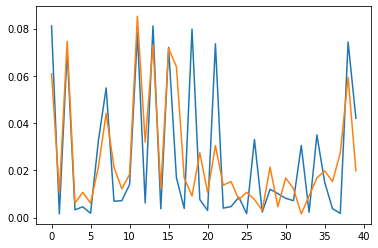

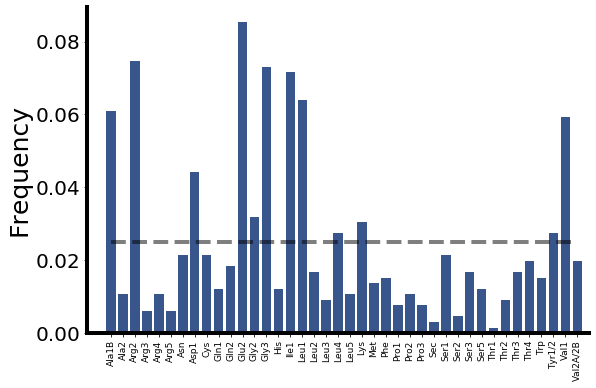

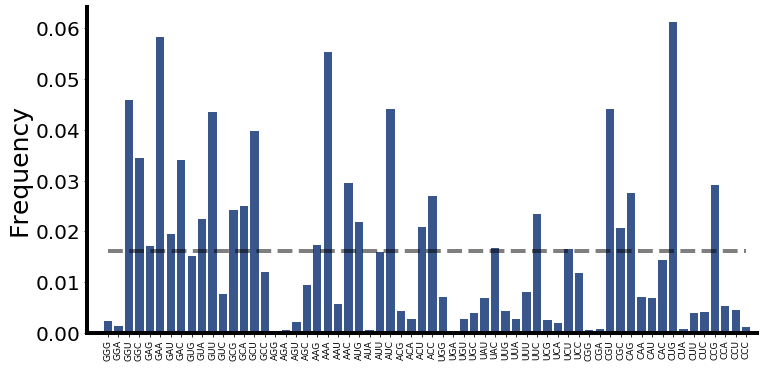

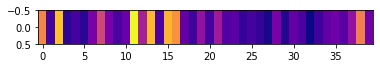

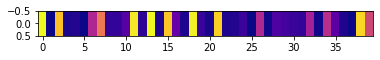

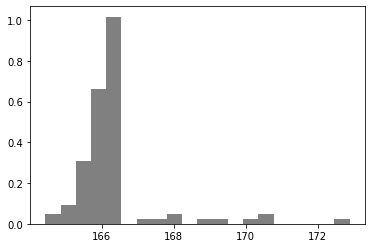

In [78]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old

gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

#fig,ax0 = plt.subplots()
#ax0.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
fig,ax0 = plt.subplots(figsize=(9,6))
ax0.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8)
ax0.plot(np.arange(40),[1/40]*40,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax0.set_xlim(-2,40)

fig,ax = plt.subplots(figsize=(12,6))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

print(min(elong_t_tRNA_list))
plt.figure()
plt.imshow(gr25_ptRNA[np.newaxis,:],aspect=4,cmap='plasma')
plt.figure()
plt.imshow(p_tRNA_list[np.argmin(elong_t_tRNA_list)][np.newaxis,:],aspect=3,cmap='plasma')

fig,ax1 = plt.subplots(1,1)
hist=ax1.hist(elong_t_tRNA_list,20,color='grey',density=True)

for ax in [ax0,ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

## Is there a correlation betweeen tRNA and codon frequencies? If so,
## can I rationally design a steeper slope to get faster elong rate?
#

In [35]:
###### Genetic algorithm for just codon shuffling ########

def run_ga_CodonSweep(tRNA_arr,elong_arr,codon_arr,gr_dict,minRange,maxRange):
    
    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    codon_arr=np.array(codon_arr)
    parents = codon_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(tRNA_arr,child_0,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(tRNA_arr,child_1,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    codon_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, codon_arr, elong_arr

    

In [2]:
###### Genetic algorithm for just codon shuffling ########

def run_ga_CodonSweep_multithread(tRNA_arr,elong_arr,codon_arr,gr_dict,minRange,maxRange):
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16

    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    codon_arr=np.array(codon_arr)
    parents = codon_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    
    syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
                      [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
                      [50,51],[52,53],[58,59,60,61]]
    
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        ##First re-normalize to make sure synonymous codons have, together, the same total frequency (keep the genome the same)
        gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
        gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)

        syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
                      [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
                      [50,51],[52,53],[58,59,60,61]]
        syn_codon_freqs = list()
        for syn_codons in syn_codon_list:
            syn_codon_freqs.append(sum(gr25_pCodon[syn_codons]))
            couple[0][syn_codons] = sum(gr25_pCodon[syn_codons])/sum(couple[0][syn_codons])*couple[0][syn_codons]
            couple[1][syn_codons] = sum(gr25_pCodon[syn_codons])/sum(couple[1][syn_codons])*couple[1][syn_codons]
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])
        
        ### Add children to list
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[tRNA_arr,recombined_children[i],gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores)(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])
    
    #### Have recombined children and their elong_t replaced culled candidates
    codon_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, codon_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [3]:
%%time
### tRNA array fixed, codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list-syn.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list-syn.npy')

syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
              [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
              [50,51],[52,53],[58,59,60,61]]
syn_codon_freqs = list()
for syn_codons in syn_codon_list:
    syn_codon_freqs.append(sum(gr25_pCodon[syn_codons]))

fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_Codon_list, elong_t_Codon_list = run_ga_CodonSweep_multithread(gr25_ptRNA,elong_t_codon_list,p_Codon_list,gr_dict,min(gr25_pCodon),max(gr25_pCodon))
    print(max(fitness))
    print(min(elong_t_Codon_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_Codon_list))
np.save('FixedtRNA_RandomCodon_1500sample_elong_t_list_syn',elong_t_Codon_list)
np.save('FixedtRNA_RandomCodon_2000sample_p_tRNA_list_syn',p_Codon_list)
np.save('minelong_arr2-RandomCodon_syn',minelong_arr)
#2 min 6 seconds
#33.5 seconds

0.010278554824969473
192.0213932623102
0.010249052364216424
192.0213932623102
0.010223503858501714
191.90780268566115
0.010203448140474951
191.90780268566115
0.010182595975717095
191.90780268566115
0.010165075320556815
191.90780268566115
0.010147304255512444
191.2137671724928
0.010167921597293553
191.2137671724928
0.01015477143015907
191.2137671724928
0.010145042508945221
191.2137671724928
0.010134669291643583
190.9643314098603
0.010139083997047068
190.9643314098603
0.010133072424046239
190.9643314098603
0.01012475912588429
190.9643314098603
0.010121618919473616
190.9643314098603
0.010115575056692675
190.9643314098603
0.010112053723608823
190.9643314098603
0.010107618084666642
190.3868128639632
0.010137348542857336
190.3868128639632
0.010131408170897563
190.3868128639632
0.010132650647449896
190.3868128639632
0.010127259298391372
190.3868128639632
0.010125381323003375
190.3868128639632
0.010120525268611574
190.3868128639632
0.010117289344640349
190.27351622703247
0.010116298939691234
1

0.010105972814426899
184.645100436441
0.010105830392127984
184.645100436441
0.010098831424792412
184.645100436441
0.01009777874268314
184.645100436441
0.010096001283058258
184.645100436441
0.010094641698118183
184.645100436441
0.010091198581828891
184.645100436441
0.01009004384894205
184.645100436441
0.010088257630451448
184.645100436441
0.010091578048032228
184.645100436441
0.010087026448921692
184.645100436441
0.010084291545278914
184.645100436441
0.010087630452121103
183.65294672920987
0.010135956334901013
183.65294672920987
0.010136521996510944
183.65294672920987
0.010132868275425892
183.65294672920987
0.010135175495225253
183.65294672920987
0.010128898014170452
183.65294672920987
0.010125593908109217
183.65294672920987
0.010131444061485766
183.65294672920987
0.010128246518836091
183.65294672920987
0.010129484176395821
183.65294672920987
0.010131603031656809
183.65294672920987
0.010129513247616287
183.65294672920987
0.010126315000322206
183.65294672920987
0.010125512885538377
183.6

0.010065178216859347
183.65294672920987
0.010068328471778198
183.5989322778414
0.010066118090482872
183.5989322778414
0.010068836233597799
183.5989322778414
0.010068024460562198
183.5989322778414
0.010065773348603698
183.5989322778414
0.01006581628014954
183.5989322778414
0.010063845081194261
183.5989322778414
0.010063761572538917
183.5989322778414
0.010069214380941632
183.5989322778414
0.01006476840755891
183.5989322778414
0.010066570008173577
183.5989322778414
0.010064192628799018
183.5185931316386
0.010064308933315858
183.5185931316386
0.010067325660904429
183.5185931316386
0.010069294163155284
183.5185931316386
0.010064327586025093
183.5185931316386
0.010072362783391495
183.5185931316386
0.010066068895284074
183.5185931316386
0.010066564544556064
183.5185931316386
0.010067425228664422
183.5185931316386
0.010066205833882234
183.5185931316386
0.010067006563581072
183.50239287661432
0.010065911967339431
183.50239287661432
0.010070236896275384
183.50239287661432
0.010064905465080496
18

0.010104453527036959
182.2930288720954
0.010101885811967304
182.2930288720954
0.010105856601989068
182.2930288720954
0.01010597491050904
182.2930288720954
0.010100160587950447
182.2930288720954
0.010099600339095878
182.2930288720954
0.01010546131934174
182.2930288720954
0.010100440296439398
182.2930288720954
0.010101112679624815
182.2930288720954
0.010103203926560049
182.2930288720954
0.010101252485500522
182.2930288720954
0.010102440261167333
182.2930288720954
0.01009913012322334
182.2930288720954
0.010107473386871327
182.2930288720954
0.010098902349729839
182.2930288720954
0.010099125389807543
182.2930288720954
0.010097954298705882
182.2930288720954
0.010096100119021744
182.2930288720954
0.010104443384756176
182.2930288720954
0.010102153972249263
182.2930288720954
0.01010223364024052
182.2930288720954
0.010103451559602145
182.2930288720954
0.010102614310814306
182.2930288720954
0.010101640242039897
182.2930288720954
0.010097392669503519
182.2930288720954
0.010103649027814372
182.2930

0.010087521517151215
182.10980479436103
0.010089253172781348
182.10980479436103
0.010085095967690777
182.10980479436103
0.010086264465612348
182.10980479436103
0.010089449184991205
182.10980479436103
0.010082283293964567
182.10980479436103
0.010086401543320286
182.10980479436103
0.010083554709049638
182.10980479436103
0.01008655550184449
182.10980479436103
0.010091510702524181
182.10980479436103
0.01008635361333898
182.10980479436103
0.010084885944679397
182.10980479436103
0.010087046281275554
182.10980479436103
0.010088405862876028
182.10980479436103
0.010084086123203904
182.10980479436103
0.010082207398770665
182.10980479436103
0.010085379260588395
182.10980479436103
0.010088199474659831
182.10980479436103
0.010083572302412459
182.10980479436103
0.010083474853675044
182.10980479436103
0.010089056494306097
182.10980479436103
0.010087976579097125
182.10980479436103
0.010083623866623663
182.10980479436103
0.010088050905216871
182.10980479436103
0.010082479950679384
182.10980479436103
0.

0.01007345194256592
182.10980479436103
0.010070205948734636
182.10980479436103
0.010071781795066383
182.10980479436103
0.010070408201071133
182.10980479436103
0.010069953708718457
182.10980479436103
0.010071629692221893
182.10980479436103
0.010071285863302883
182.10980479436103
0.0100674327387041
182.10980479436103
0.010074712000506398
182.10980479436103
0.010067859455813451
182.10980479436103
0.010066106728394999
182.10980479436103
0.01007019769989284
182.10980479436103
0.0100704666948684
182.10980479436103
0.01007015354312742
182.10980479436103
0.010070432297738106
182.10980479436103
0.010074852560703217
182.10980479436103
0.01007269442838713
182.10980479436103
0.0100730301236423
182.10980479436103
0.010070232290930221
182.10980479436103
0.010075831502219404
181.8961102614511
0.0100800931230376
181.8961102614511
0.010082071282509512
181.8961102614511
0.010083674615581645
181.8961102614511
0.010079023030022897
181.8961102614511
0.010082469349929764
181.8961102614511
0.0100795628933679

0.010071596329606178
181.8961102614511
0.010081809611246773
181.8961102614511
0.01007098854175846
181.8961102614511
0.01007219008964659
181.8961102614511
0.010071954680204078
181.8961102614511
0.010072823729150837
181.8961102614511
0.010069836283608717
181.8961102614511
0.010073393447180437
181.8961102614511
0.010076214619441779
181.8961102614511
0.010073089035516875
181.8961102614511
0.010070685013974543
181.8961102614511
0.01007550012659046
181.8961102614511
0.010072407596699922
181.8961102614511
0.010070794442043798
181.8961102614511
0.010068428996712243
181.8961102614511
0.01007106569724881
181.8961102614511
0.0100731457270974
181.8961102614511
0.010068214139247668
181.8961102614511
0.0100731285537955
181.8961102614511
0.010074041426604188
181.8961102614511
0.010077100268474845
181.8961102614511
0.010070899396504034
181.8961102614511
0.010071124810219162
181.8961102614511
0.010074906736898053
181.8961102614511
0.010071541852233037
181.8961102614511
0.010068920284970641
181.89611026

0.010093678512727161
181.3956932184787
0.010094321077112412
181.3956932184787
0.010092039971498526
181.3956932184787
0.010095305967624913
181.3956932184787
0.010090523260747483
181.3956932184787
0.010091418124552913
181.3956932184787
0.010094645428198252
181.3956932184787
0.010088339136927827
181.3956932184787
0.010091170182892078
181.3956932184787
0.01009072643599292
181.3956932184787
0.010094961857416786
181.3956932184787
0.010090002666915421
181.3956932184787
0.010092300078707305
181.3956932184787
0.010090346034527575
181.3956932184787
0.010089063109207824
181.3956932184787
0.0100885079003264
181.3956932184787
0.010089440231962031
181.3956932184787
0.010089502596054177
181.3956932184787
0.010087381718311323
181.3956932184787
0.010098486975157936
181.3956932184787
0.010093016871052445
181.3956932184787
0.010087345063842047
181.3956932184787
0.010093826418779378
181.3956932184787
0.010088552921852453
181.3956932184787
0.010091244776614865
181.3956932184787
0.010091583464005214
181.395

In [72]:
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
print(gr25_pCodon)

p_tRNA_list=np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list-syn.npy')

p_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_p_tRNA_list_slow.npy')



codonssum = list()
codonssum2 = list()
codonssum3 = list()
for syn_codons in syn_codon_list:
    codonssum.append(sum(p_Codon_list[0][syn_codons]))
    codonssum2.append(sum(gr25_pCodon[syn_codons]))
    codonssum3.append(sum(p_tRNA_list[0][syn_codons]))
print(codonssum)
print(codonssum2)
print(codonssum3)
print(syn_codon_freqs)

[2.37797751e-03 1.26959816e-03 4.58969812e-02 3.44302930e-02
 1.70992705e-02 5.83007537e-02 1.94167909e-02 3.39970175e-02
 1.50941115e-02 2.24799484e-02 4.35089275e-02 7.72842691e-03
 2.42936601e-02 2.50594494e-02 3.97908186e-02 1.18999637e-02
 3.02285277e-05 6.34799081e-04 2.20668252e-03 9.38091975e-03
 1.73511749e-02 5.54290436e-02 5.65273467e-03 2.94325098e-02
 2.18350732e-02 5.23961146e-04 1.59102817e-02 4.41941075e-02
 4.20176535e-03 2.62988191e-03 2.07972270e-02 2.69033896e-02
 7.08355165e-03 1.91447342e-04 2.78102455e-03 3.83902301e-03
 6.77119020e-03 1.66458426e-02 4.30252710e-03 2.75079602e-03
 7.98033130e-03 2.34271089e-02 2.52912015e-03 1.99508283e-03
 1.64543952e-02 1.17689734e-02 6.24722905e-04 6.75103785e-04
 4.41538027e-02 2.07468462e-02 2.74878078e-02 7.06339930e-03
 6.83164725e-03 1.43182459e-02 6.12127685e-02 8.26246423e-04
 3.88940389e-03 4.12115594e-03 2.90395389e-02 5.21945911e-03
 4.41336504e-03 1.09830317e-03]
[0.08397484986497925, 0.07540002418282214, 0.05341380

[ 4.62535679e-03  1.04105609e-03 -5.04163251e-03 -6.24780363e-04
  2.82606619e-02 -2.82606619e-02  9.36140582e-03 -9.36140582e-03
  9.85901629e-03  7.93271530e-03 -1.51045524e-02 -2.68717923e-03
  1.54679156e-02 -3.88377555e-03 -3.31268957e-04 -1.12528711e-02
  2.91232186e-04  6.87697804e-05  5.50123866e-03 -9.00361004e-03
  1.49791420e-02 -1.49791420e-02  5.45203093e-03 -5.45203093e-03
  3.46944695e-18  4.75514117e-02 -9.67058494e-03 -3.78808268e-02
  9.88230788e-03  5.68257429e-03  9.67118026e-03 -2.52360624e-02
  8.67361738e-19  2.71050543e-20  9.92313190e-04 -9.92313190e-04
  2.16717633e-03 -2.16717633e-03  3.41019094e-02  7.02892430e-04
  1.01940719e-02 -1.01940719e-02 -4.64511455e-04 -7.39110014e-04
  1.61867766e-02 -1.14807837e-02 -9.13064510e-05  2.35778359e-02
 -2.46351651e-02  7.88633667e-04 -7.24433865e-03  7.24433865e-03
 -9.80383322e-06  9.80383322e-06 -4.36763135e-02  2.00906169e-03
 -2.22881611e-03  9.09126614e-03 -2.52000882e-02 -2.11548087e-03
  1.80831509e-02  9.23241

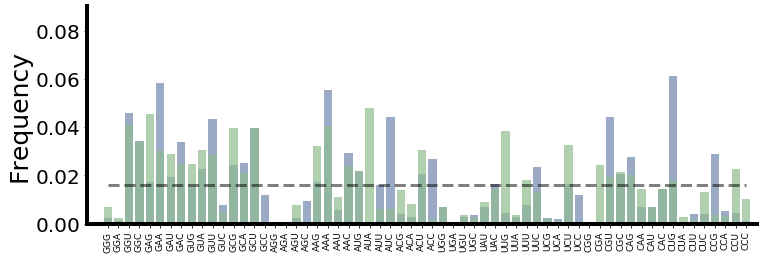

In [30]:
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


p_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_p_tRNA_list_syn.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_elong_t_list_syn.npy')


fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(62),p_Codon_list[np.argmin(elong_t_Codon_list)],color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
codon_dist = (p_Codon_list[np.argmin(elong_t_Codon_list)] - gr25_pCodon)
print(codon_dist)
print(sum(codon_dist))



for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)
    ax.set_ylim(0,0.09)
   # ax.set_yticks(np.arange(0,0.36,0.05))

100
[ 3.04714794e-02  4.01019723e-02 -4.56532862e-02 -2.49201655e-02
  1.66078229e-02 -1.66078229e-02  1.82599186e-02 -1.82599186e-02
 -1.07662495e-02 -2.18088112e-02 -4.20867138e-02  7.46617745e-02
 -1.78118493e-02 -2.42731327e-02 -2.93754342e-02  7.14604161e-02
  2.74308394e-02  8.62543398e-03 -1.45068733e-03 -8.96130538e-03
  5.38077765e-03 -5.38077765e-03  5.67173475e-03 -5.67173475e-03
  6.93889390e-18  1.12502807e-02 -8.39437193e-03 -2.85590873e-03
 -2.56965014e-03  1.34768067e-02 -1.98482249e-02  8.94106835e-03
  2.60208521e-18  5.42101086e-20 -2.72518465e-03  2.72518465e-03
  6.81416625e-04 -6.81416625e-04 -1.63811251e-03  4.13938128e-02
  7.87403456e-03 -7.87403456e-03  1.34901556e-02 -1.24431520e-03
 -1.27356274e-02  1.09017797e-02  2.48506854e-02  1.73657616e-03
 -4.32316690e-02 -1.94118660e-02 -1.91541123e-02  1.91541123e-02
  4.42489935e-03 -4.42489935e-03 -6.08419231e-02  9.45431043e-03
  4.13428094e-03  7.49763137e-03 -1.47156311e-02  1.91078080e-03
 -2.22241874e-03  1.5

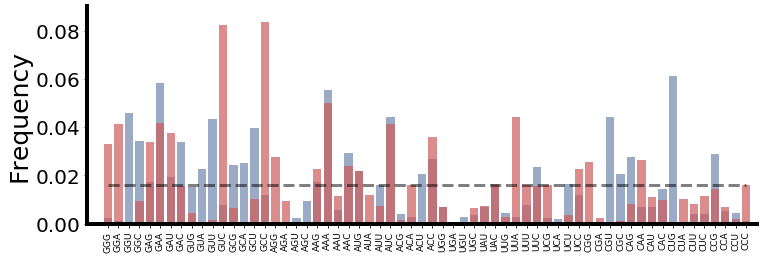

In [101]:
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


p_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_p_tRNA_list_slow.npy')
elong_t_Codon_list =np.load('FixedtRNA_RandomCodon_1500sample_elong_t_list_slow.npy')

print(len(elong_t_Codon_list))
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),gr25_pCodon,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(62),p_Codon_list[np.argmax(elong_t_Codon_list)],color='indianred',width=0.8,alpha=0.7)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
codon_dist = (p_Codon_list[np.argmax(elong_t_Codon_list)] - gr25_pCodon)
print(codon_dist)
print(sum(codon_dist))


for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)
    ax.set_ylim(0,0.09)
    #ax.set_yticks(np.arange(0,0.36,0.05))

[ 1.94688918e-02 -6.38523373e-03  8.22376968e-04 -2.99875048e-05
 -3.63900900e-03  2.40490544e-03 -1.11639458e-02  1.43837056e-02
 -1.87580269e-02 -1.04256773e-02 -1.31938266e-02 -6.12665485e-03
 -2.95651679e-02  5.13938109e-04 -7.86021317e-03  4.12095560e-03
 -4.76296971e-02 -1.20494033e-02  4.71140414e-02 -1.62214553e-02
  2.28159998e-04  4.92092099e-02 -1.21910708e-02  3.42890506e-03
  8.35453113e-03  1.68364484e-03  1.29153851e-02 -2.87625954e-06
 -1.50736644e-02 -2.32266565e-04 -1.01573129e-02 -5.35040366e-03
  4.78248663e-02 -4.79860655e-04  1.45026864e-02 -1.36915577e-02
 -1.31929572e-02 -2.28860851e-02  5.25756494e-03  4.40725851e-02]
1.0408340855860843e-16
normed tRNA dist  0.5526127072105026


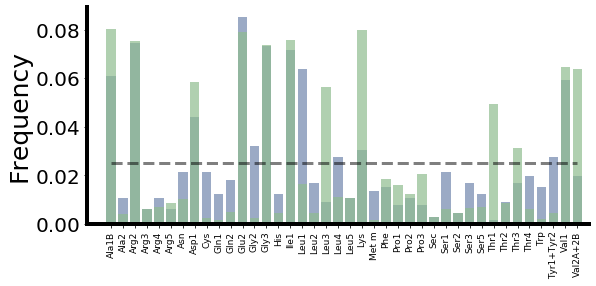

In [101]:
p_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']



fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)],color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

[-0.05580158 -0.00561968 -0.07120558  0.05497353  0.06285722  0.00829744
 -0.01944681 -0.03863801  0.01917297  0.00824964 -0.0130762  -0.00892491
  0.03467582 -0.07023549 -0.00159409 -0.06432673 -0.04343517 -0.00911023
 -0.00579376  0.06039773  0.00630406 -0.02972932 -0.00765281 -0.01072193
  0.06955864  0.05922105 -0.00681348  0.0741758  -0.01088883  0.05372121
 -0.01036441 -0.00125622  0.00321737  0.06737674 -0.01086352 -0.0125589
  0.01691798 -0.0164608  -0.0568369  -0.01776186]
6.938893903907228e-17
normed tRNA dist  1.1982343997083622


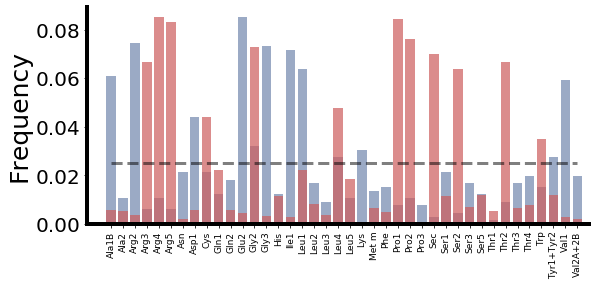

In [81]:
p_tRNA_list = np.load('Slower_RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('Slower_RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']


fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmax(elong_t_tRNA_list)],color='indianred',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)


In [92]:
###### Genetic algorithm for tRNA &  codon shuffling ########

def run_ga_tRNACodonSweep(combined_arr,elong_arr,gr_dict,minRangetRNA,maxRangetRNA,minRangeCodon,maxRangeCodon):
    
    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    combined_arr=np.array(combined_arr)
    parents = combined_arr[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(np.arange(40),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        
        recombination_locs = np.random.choice(np.arange(40,102),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        
        child_0 = np.zeros(len(couple[0]))
        child_1 = np.zeros(len(couple[0]))

        ### Re-normalize each recombined children
        child_0[0:40] = couple[0][0:40]/np.sum(couple[0][0:40])
        child_1[0:40] = couple[1][0:40]/np.sum(couple[1][0:40])

        child_0[40:102] = couple[0][40:102]/np.sum(couple[0][40:102])
        child_1[40:102] = couple[1][40:102]/np.sum(couple[1][40:102])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0[0:40],child_0[40:102],gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1[0:40],child_1[40:102],gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    combined_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, combined_arr, elong_arr

In [99]:
###### Genetic algorithm for tRNA &  codon shuffling ########

def run_ga_tRNACodonSweep_multithread(combined_arr,elong_arr,gr_dict,minRangetRNA,maxRangetRNA,minRangeCodon,maxRangeCodon):
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16


    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    combined_arr=np.array(combined_arr)
    parents = combined_arr[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(np.arange(40),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        
        recombination_locs = np.random.choice(np.arange(40,102),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        
        child_0 = np.zeros(len(couple[0]))
        child_1 = np.zeros(len(couple[0]))

        ### Re-normalize each recombined children
        child_0[0:40] = couple[0][0:40]/np.sum(couple[0][0:40])
        child_1[0:40] = couple[1][0:40]/np.sum(couple[1][0:40])

        child_0[40:102] = couple[0][40:102]/np.sum(couple[0][40:102])
        child_1[40:102] = couple[1][40:102]/np.sum(couple[1][40:102])
        
        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
    
    
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[recombined_children[i][0:40],recombined_children[i][40:102],gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])

    #### Have recombined children and their elong_t replaced culled candidates
    combined_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, combined_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [100]:
### tRNA varying codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list.npy')

elong_arr = np.load('RandomtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('RandomtRNA_RandomCodon_100sample_p_Codon_list.npy')
p_tRNA_list = np.load('RandomtRNA_RandomCodon_100sample_p_tRNA_list.npy')

combined_arr = [np.append(p_tRNA_list[i], p_Codon_list[i]) for i in np.arange(len(p_tRNA_list))]
fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, combined_arr, elong_arr = run_ga_tRNACodonSweep_multithread(combined_arr,elong_arr,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),min(gr25_pCodon),max(gr25_pCodon))
    print(max(fitness))
    print(min(elong_arr))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_arr))
    if i%250==0:
        np.save('RandomtRNA_RandomCodon_1500sample_elong_t_list',elong_arr)
        np.save('RandomtRNA_RandomCodon_1500sample_p_tRNA_list',combined_arr)
        np.save('minelong_arr2-RandomtRNARandomCodon_1500sample',minelong_arr)
np.save('RandomtRNA_RandomCodon_1500sample_elong_t_list',elong_arr)
np.save('RandomtRNA_RandomCodon_1500sample_p_tRNA_list',combined_arr)
np.save('minelong_arr2-RandomtRNARandomCodon_1500sample',minelong_arr)

0.010340239371996478
204.00086933795282
0.010306917647629572
204.00086933795282
0.010285138313349795
204.00086933795282
0.010264177744236182
159.75017737539113
0.013056957636147544
159.75017737539113
0.013054426125858885
159.75017737539113
0.013025472752827099
159.75017737539113
0.0130089555057471
159.75017737539113
0.0129633610595469
159.75017737539113
0.012947003888536474
159.75017737539113
0.012942550869888065
159.75017737539113
0.012897390915737888
159.75017737539113
0.01288687705670321
159.75017737539113
0.012844741533051327
159.75017737539113
0.012902323852385489
159.75017737539113
0.012807081308127783
159.75017737539113
0.01276527041570421
159.75017737539113
0.012737837131434029
159.75017737539113
0.01273022057078227
159.75017737539113
0.012672244768644913
159.75017737539113
0.012654173079685459
159.75017737539113
0.012634318708642116
159.75017737539113
0.012583976285428337
159.75017737539113
0.012558377392969009
159.75017737539113
0.012487934386271384
159.75017737539113
0.01245

0.010724198357482518
144.00949830111745
0.010730515677324245
144.00949830111745
0.010724397527096618
144.00949830111745
0.010745969683419647
144.00949830111745
0.010738960634295094
142.73178622360203
0.010798959882189573
142.73178622360203
0.010837663187556062
142.73178622360203
0.010829467735602744
142.73178622360203
0.0108248388009711
142.73178622360203
0.010806456974281578
142.73178622360203
0.010803848454539315
142.73178622360203
0.010802900919899628
142.73178622360203
0.01079685467714318
142.73178622360203
0.010809147222700544
142.73178622360203
0.010789552250837007
142.73178622360203
0.010783394863403944
142.73178622360203
0.010780718272367077
142.73178622360203
0.010753762107447452
142.73178622360203
0.010783864960942281
142.73178622360203
0.010742839364162749
142.73178622360203
0.010763163830708817
142.73178622360203
0.010773698640442182
142.73178622360203
0.010731928014527015
142.73178622360203
0.010771586716373878
142.73178622360203
0.010737682101686003
142.73178622360203
0.0

0.010631536837904963
140.69832003231556
0.010608947698387956
140.69832003231556
0.010587049284077842
140.69832003231556
0.010606043514119841
140.69832003231556
0.010598478413081947
140.69832003231556
0.010603916698009325
140.69832003231556
0.010593620885844337
140.69832003231556
0.010657570880783524
140.69832003231556
0.0105931824582172
140.69832003231556
0.010580726778257374
140.69832003231556
0.010594422108567328
140.69832003231556
0.010571071480512142
140.69832003231556
0.010584765130986142
140.69832003231556
0.01057675165739718
140.69832003231556
0.010590527108686517
140.69832003231556
0.010555527057071442
140.69832003231556
0.010573223431294416
140.69832003231556
0.01058208857031841
140.69832003231556
0.010544225356844138
140.69832003231556
0.010552662481086366
140.69832003231556
0.010607401435273802
140.69832003231556
0.010563979371383309
140.69832003231556
0.010562540086093936
140.69832003231556
0.0105933456766863
140.69832003231556
0.010611200090597156
140.69832003231556
0.0105

0.010720236158210309
137.39506517850973
0.010724930146709177
137.39506517850973
0.010713000546411488
137.39506517850973
0.010786626016070968
137.39506517850973
0.01072115592360625
137.39506517850973
0.01069893197127603
137.39506517850973
0.010719849094533022
137.39506517850973
0.010727629582292873
137.39506517850973
0.010735207116248357
137.39506517850973
0.010731493314637826
137.39506517850973
0.010726604730986668
137.39506517850973
0.010705386775000748
137.39506517850973
0.010704853707201296
137.39506517850973
0.010756184346290611
137.39506517850973
0.010711051917042507
137.39506517850973
0.010719780738681836
137.39506517850973
0.010683625059968112
137.39506517850973
0.010743902962146298
137.39506517850973
0.010756028521819045
137.39506517850973
0.010724075690650425
137.39506517850973
0.010730819706639628
137.39506517850973
0.010728953568533534
137.39506517850973
0.010696808163132662
137.39506517850973
0.010729241772637165
137.39506517850973
0.01070775830232396
137.39506517850973
0.0

0.010650298513229852
137.39506517850973
0.010623346180370693
137.39506517850973
0.010634284004011906
137.39506517850973
0.01059626270410033
137.39506517850973
0.01064469831135774
137.39506517850973
0.01059303976743791
137.39506517850973
0.010632122881434449
137.39506517850973
0.010601579697553485
137.39506517850973
0.010640782859824446
137.39506517850973
0.010613204092174153
137.39506517850973
0.010612136441250619
137.39506517850973
0.010619943382278164
137.39506517850973
0.010627419277831349
137.39506517850973
0.010618162914964702
137.39506517850973
0.010592641185437318
137.39506517850973
0.010611496548386504
137.39506517850973
0.01059815676013015
137.39506517850973
0.010619286767759124
137.39506517850973
0.010643424732651624
137.39506517850973
0.010627047778590666
137.39506517850973
0.010625202928193892
137.39506517850973
0.010611063742360689
137.39506517850973
0.010608934592289824
137.39506517850973
0.010618454253678657
137.39506517850973
0.010612961995019456
137.39506517850973
0.01

0.010561868724586298
137.39506517850973
0.010595367489543518
137.39506517850973
0.010584158458060442
137.39506517850973
0.010587917806105306
137.39506517850973
0.010555793269680116
137.39506517850973
0.01055994303293578
137.39506517850973
0.010626644079346157
137.39506517850973
0.01059453188615388
137.39506517850973
0.010612433015944358
137.39506517850973
0.010563680706967527
137.39506517850973
0.010574418403714807
137.39506517850973
0.010580606671050374
137.39506517850973
0.010604019533250422
137.39506517850973
0.010562525787408978
137.39506517850973
0.01055327214466157
137.39506517850973
0.010576875894855791
137.39506517850973
0.01056570466242676
137.39506517850973
0.010564542613716836
137.39506517850973
0.010561668115121119
137.39506517850973
0.010543733984917312
137.39506517850973
0.010560049705999643
137.39506517850973
0.010590208027811717
137.39506517850973
0.010556204808630312
137.39506517850973
0.010605302378916019
137.39506517850973
0.010575031262071734
137.39506517850973
0.01

0.010598524376264655
136.36503032878682
0.010587262870946973
136.36503032878682
0.010594011270471654
136.36503032878682
0.010579781642078274
136.36503032878682
0.010611649500656713
136.36503032878682
0.010591607460815477
136.36503032878682
0.01060415697100035
136.36503032878682
0.010589208543416532
136.36503032878682
0.010618092010896491
136.36503032878682
0.010596083592600244
136.36503032878682
0.01057319981778107
136.36503032878682
0.010629483350080442
136.36503032878682
0.01057309483782595
136.36503032878682
0.010598757979569051
136.36503032878682
0.010599265778776781
136.36503032878682
0.010556070155445832
136.36503032878682
0.010624486766650438
136.36503032878682
0.01061043616280219
136.36503032878682
0.010575997011119423
136.36503032878682
0.010586036096225694
136.36503032878682
0.010583902950767965
136.36503032878682
0.010581257619649242
136.36503032878682
0.010577068577959058
136.36503032878682
0.010563123076338289
136.36503032878682
0.010627628755123117
136.36503032878682
0.01

0.010550931901025155
136.36503032878682
0.010556819150966224
136.36503032878682
0.01053699772615862
136.36503032878682
0.010512815141496915
136.36503032878682
0.01060545351745762
136.36503032878682
0.010603435306150743
136.36503032878682
0.01055648919737656
136.36503032878682
0.010552380310042256
136.36503032878682
0.010570151398066859
136.36503032878682
0.010526716127546094
136.36503032878682
0.010537726422230682
136.36503032878682
0.01057744696691494
136.36503032878682
0.010550703429047426
136.36503032878682
0.01055742177616014
136.36503032878682
0.010557697459221527
136.36503032878682
0.010551590385574171
136.36503032878682
0.010544678192182647
136.36503032878682
0.010550305588843187
136.36503032878682
0.010551167483320278
136.36503032878682
0.010546617384728594
136.36503032878682
0.010535119505423123
136.36503032878682
0.010544381318864333
136.36503032878682
0.01054966350298233
136.36503032878682
0.010538217942346105
136.36503032878682
0.010556918673697945
136.36503032878682
0.0105

R^2 0.4232403135634091
1.0015378565230553


(0, 0.12)

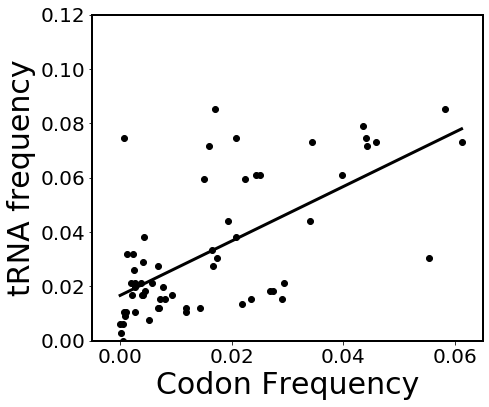

In [584]:
#### trna frequency vs codon frequency, baseline
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_ylim(0,0.12)

R^2 0.4615385191976392
1.4556996291697233


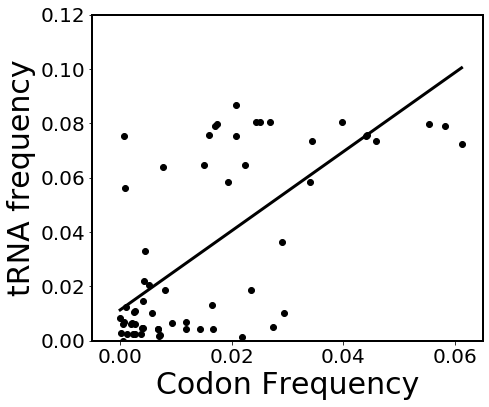

In [80]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

p_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmin(elong_t_tRNA_list)],gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.3032552187264791
0.995933646254141


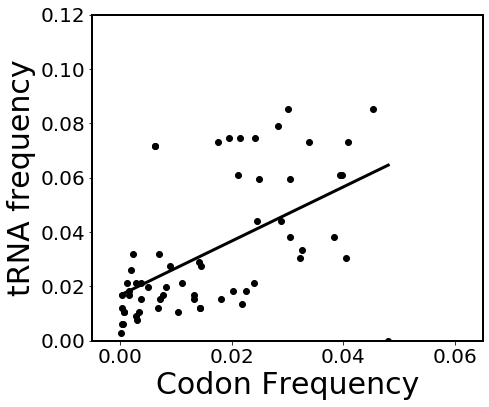

In [81]:
#### trna frequency vs codon frequency, ga faster, tRNA fixed, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

p_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_p_tRNA_list_syn.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_elong_t_list_syn.npy')

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,p_Codon_list[np.argmin(elong_t_Codon_list)],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.06487517128003639
0.2685521347820137


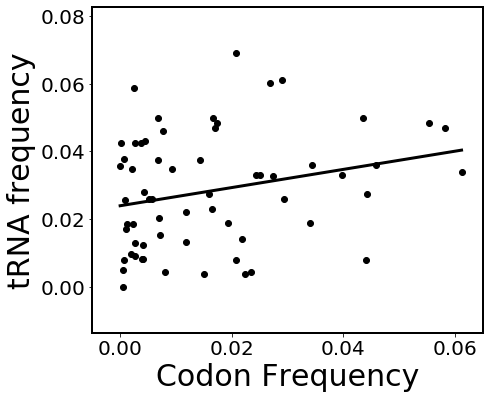

In [451]:
#### trna frequency vs codon frequency, ga faster (trna uniform, codon WT)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))



ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(ptRNA_uniform,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


R^2 0.002570772388803877
0.0779545324347358


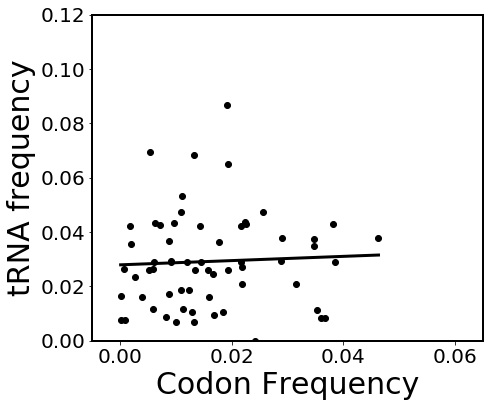

In [66]:
#### trna frequency vs codon frequency, ga faster (trna uniform, codon WT)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))

#Random codon
syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
              [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
              [50,51],[52,53],[58,59,60,61]]
syn_codon_freqs = list()
for syn_codons in syn_codon_list:
    syn_codon_freqs.append(sum(gr25_pCodon[syn_codons]))
        
pCodon_uniform = np.zeros(len(gr25_pCodon))
for syn_codons in syn_codon_list:
    pCodon_uniform[syn_codons] = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(syn_codons))
    pCodon_uniform[syn_codons] = sum(gr25_pCodon[syn_codons])/sum(pCodon_uniform[syn_codons])*pCodon_uniform[syn_codons]


ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(ptRNA_uniform,pCodon_uniform,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)
ax.set_ylim(0,0.12)



def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)




R^2 0.452025772517737
0.4140154768666496


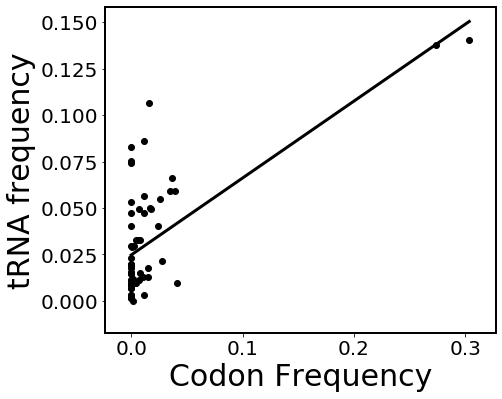

In [42]:
#### trna frequency vs codon frequency, ga faster, tRNA random, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#np.save('',elong_t_Codon_list)
#np.save('',p_Codon_list)




p_Codon_list = np.load('RandomtRNA_RandomCodon_1500sample_p_tRNA_list.npy')
elong_t_Codon_list = np.load('RandomtRNA_RandomCodon_1500sample_elong_t_list.npy')


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_Codon_list[np.argmin(elong_t_Codon_list)][0:40],p_Codon_list[np.argmin(elong_t_Codon_list)][40:102],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
#ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.19815760828151796
-0.788795272796071


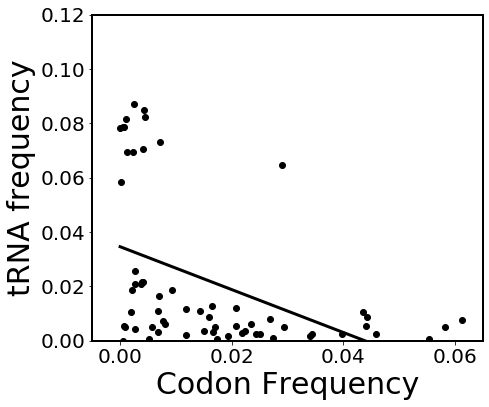

In [102]:
#### trna frequency vs codon frequency, ga slower (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

p_tRNA_list = np.load('Slower_RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('Slower_RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmax(elong_t_tRNA_list)],gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.020625260854435057
-0.19764979042891864


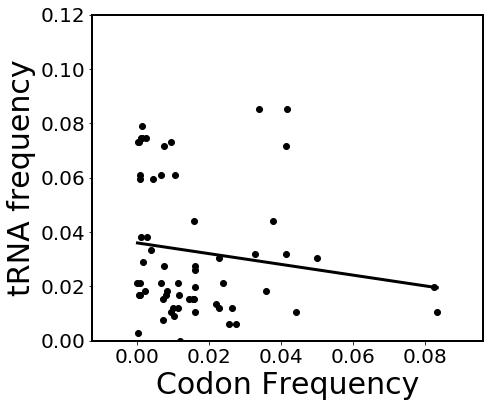

In [105]:
#### trna frequency vs codon frequency, ga slower, tRNA fixed, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

p_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_p_tRNA_list_slow.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_1500sample_elong_t_list_slow.npy')

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,p_Codon_list[np.argmax(elong_t_Codon_list)],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
#ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

In [300]:
#np.save('RandomtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_tRNA_list)
#np.save('RandomtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_tRNA_distrib)

#np.save('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_list)
#np.save('FixedtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_distrib)

#np.save('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_10ksample_elong_t_list',elong_t_tRNA_list)


#np.save('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_100sample_elong_t_list',elong_t_tRNA_list)


In [7]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(gr25_Codon,np.array([186.4]*100),[gr25_ptRNA]*100,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
np.save('WTtRNA_FixedCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
np.save('WTtRNA_FixedCodon_1500sample_p_tRNA_list2',p_tRNA_list)
np.save('minelong_arr2-tRNA-WTstarting',minelong_arr)

0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
183.89438507762537
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.07933210131068
0.009999999999999997
186.4
0.009999999999999997
185.35527124146734
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.4844946282085
0.009999999999999997
186.4
0.009999999999999997
183.393469

0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.18023106812004
0.009999999999999997
185.52999979551478
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.5232460002816
0.009999999999999997
186.4
0.009999999999999997
185.49559687462192
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.00

0.009999999999999997
185.0676713233892
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.3775871542217
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.06472616911427
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.2483595229199
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.67854575796957
0.009999999999999997
185.326915937933
0.009999999999999997
186.4
0.009999999999999997
186.4
0.0099999

0.009999999999999997
186.15051953681942
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
183.52754997380686
0.009999999999999997
185.25715791580217
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.61857080612975
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.0

0.009999999999999997
186.4
0.009999999999999997
184.89940239155453
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.02408711655846
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.0053552542865
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999

0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
184.20691850706208
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.9607487989608
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.58298054181628
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.59928408004546
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.5397041088868
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
185.83032942231569
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.009999999999999997
186.4
0.0099